Codes - Fasten-simt 17/06/2020

Recent updates:

-

Code written by:

- Ricardo Menezes Prates - UFBA/UNIVASF

... 

In [1]:
#install face_recognition - google CoLab
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=65f0159c2818fc875d2c59f53040e6bac9c2b607bd77c52c525c0ee2c5c949c4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
#import face_recognition lib
import face_recognition
print('face_reconition version:', face_recognition.__version__)

face_reconition version: 1.2.3


In [3]:
#Mylibs
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
#connect to google drive
try:
  from google.colab import drive
  drive.mount('/content/drive',force_remount = True)
  COLAB = True
  print("Note: using google CoLab")
  %tensorflow_version 2.x
except:
  print("Note: not using google CoLab")
  COLAB = False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Note: using google CoLab


In [6]:
#import dataset from computer memory - google drive
if COLAB:
  from zipfile import ZipFile
  file_name = "/content/drive/My Drive/datasets/faces.zip" 
  with ZipFile(file_name,'r') as myzip:
    myzip.extractall()
    print('Note: Dataset opdl - download finalized')

Note: Dataset opdl - download finalized


In [7]:
#import image
image = face_recognition.load_image_file("faces_1.jpg")

In [8]:
#face landmarks
face_landmarks_list = face_recognition.face_landmarks(image)
print(face_landmarks_list,"\n\n")

[{'chin': [(78, 1065), (80, 1076), (81, 1086), (83, 1097), (87, 1107), (93, 1115), (101, 1121), (110, 1127), (120, 1129), (131, 1128), (141, 1123), (150, 1117), (157, 1109), (161, 1098), (162, 1087), (163, 1075), (164, 1062)], 'left_eyebrow': [(84, 1056), (88, 1050), (95, 1048), (102, 1047), (110, 1050)], 'right_eyebrow': [(126, 1049), (135, 1046), (144, 1046), (152, 1049), (157, 1056)], 'nose_bridge': [(119, 1059), (119, 1066), (120, 1073), (120, 1080)], 'nose_tip': [(112, 1085), (116, 1087), (120, 1088), (124, 1086), (128, 1085)], 'left_eye': [(92, 1061), (97, 1057), (104, 1057), (109, 1062), (103, 1063), (97, 1064)], 'right_eye': [(131, 1061), (136, 1056), (142, 1056), (147, 1061), (143, 1063), (136, 1063)], 'top_lip': [(108, 1099), (113, 1095), (117, 1094), (121, 1095), (125, 1094), (131, 1095), (137, 1099), (134, 1099), (125, 1097), (121, 1098), (117, 1097), (110, 1099)], 'bottom_lip': [(137, 1099), (131, 1103), (126, 1104), (122, 1105), (117, 1104), (113, 1103), (108, 1099), (110

In [9]:
#create dictionary
features_dict = dict()
count=0
for i in range(0,len(face_landmarks_list)):
    for feature in face_landmarks_list[0]:
        count+=1
        print("FEATURE is ",feature)
        if feature in features_dict:
            for j in range(0,len(face_landmarks_list[i][feature])):
                features_dict[feature].append(face_landmarks_list[i][feature][j])
        else:
            features_dict[feature] = face_landmarks_list[i][feature]           
print("Ran",count,"times")

FEATURE is  chin
FEATURE is  left_eyebrow
FEATURE is  right_eyebrow
FEATURE is  nose_bridge
FEATURE is  nose_tip
FEATURE is  left_eye
FEATURE is  right_eye
FEATURE is  top_lip
FEATURE is  bottom_lip
FEATURE is  chin
FEATURE is  left_eyebrow
FEATURE is  right_eyebrow
FEATURE is  nose_bridge
FEATURE is  nose_tip
FEATURE is  left_eye
FEATURE is  right_eye
FEATURE is  top_lip
FEATURE is  bottom_lip
FEATURE is  chin
FEATURE is  left_eyebrow
FEATURE is  right_eyebrow
FEATURE is  nose_bridge
FEATURE is  nose_tip
FEATURE is  left_eye
FEATURE is  right_eye
FEATURE is  top_lip
FEATURE is  bottom_lip
FEATURE is  chin
FEATURE is  left_eyebrow
FEATURE is  right_eyebrow
FEATURE is  nose_bridge
FEATURE is  nose_tip
FEATURE is  left_eye
FEATURE is  right_eye
FEATURE is  top_lip
FEATURE is  bottom_lip
FEATURE is  chin
FEATURE is  left_eyebrow
FEATURE is  right_eyebrow
FEATURE is  nose_bridge
FEATURE is  nose_tip
FEATURE is  left_eye
FEATURE is  right_eye
FEATURE is  top_lip
FEATURE is  bottom_lip
FEATU

In [10]:
#insert key features
count=0
for feature in features_dict:
    print(feature)
    count+=1
    for x in features_dict[feature]:
        cv2.circle(image,x, 1, (0,255,255), 2)
print(count)

chin
left_eyebrow
right_eyebrow
nose_bridge
nose_tip
left_eye
right_eye
top_lip
bottom_lip
9


In [ ]:
#print key points in cv2
cv2.imshow('Output',image)
cv2.waitKey(0)

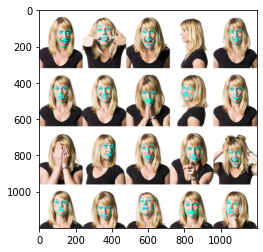

In [12]:
#print key points in pyplot
plt.imshow(image)
plt.show()